In [ ]:




import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def load_json(file_path):
    with open(f"{file_path}") as f:
        data = json.load(f)
    return data

def load_csv(file_path):
    with open(file_path, "r") as f:
        # split by ;
        data = f.readlines()
        header = data[0].split(";")
        data = [line.split(";") for line in data[1:]]
        data = [dict(zip(header, line)) for line in data]
    return data


def id_to_initial_context(id: str) -> str:
    # 204-590 -> csv/204-csv/590.csv
    splitted_id = id.split("-")
    return f"csv/{splitted_id[0]}-csv/{splitted_id[1]}.csv"

# load evaluation data ids
evaluation_sample_path = "../data/wiki_table_questions/evaluation_ids_200.json"
evaluation_sample_data = load_json(evaluation_sample_path)

# load category mapper
path = "../data/wiki_table_questions/id_mapper_questions.json"
id_mapper_data = load_json(path)

filtered_id_mapper_data = []
for doc in id_mapper_data:
    question_id = doc["question_id"]
    doc_id = doc["id"]
    for eval_doc in evaluation_sample_data:
        if eval_doc["question_id"] == question_id and eval_doc["doc_id"] == doc_id:
            filtered_id_mapper_data.append(doc)
            break


questions_path = "../data/wiki_table_questions/all_training_questions.csv"
questions = pd.read_csv(filepath_or_buffer=questions_path, sep=";")
questions.fillna("", inplace=True)

# questions to dict
questions = questions.to_dict(orient="records")
questions_filtered = [q for q in questions if q["id"] in id_list]







['nt-2265', 'nt-6341', 'nt-8577', 'nt-11168', 'nt-3356', 'nt-7124', 'nt-2283', 'nt-10940', 'nt-9321', 'nt-5625', 'nt-8505', 'nt-5127', 'nt-8910', 'nt-2033', 'nt-12477', 'nt-5937', 'nt-8549', 'nt-8906', 'nt-7681', 'nt-13334', 'nt-13787', 'nt-11850', 'nt-3631', 'nt-12640', 'nt-912', 'nt-11227', 'nt-11355', 'nt-13757', 'nt-9690', 'nt-6601', 'nt-10347', 'nt-9264', 'nt-3668', 'nt-1383', 'nt-9063', 'nt-2285', 'nt-3369', 'nt-3165', 'nt-10401', 'nt-8334', 'nt-13101', 'nt-3181', 'nt-352', 'nt-3265', 'nt-10329', 'nt-11509', 'nt-4431', 'nt-11658', 'nt-7089', 'nt-6231', 'nt-7730', 'nt-6317', 'nt-10735', 'nt-4716', 'nt-5964', 'nt-2710', 'nt-12403', 'nt-657', 'nt-10473', 'nt-6140', 'nt-2282', 'nt-11778', 'nt-11630', 'nt-12234', 'nt-3186', 'nt-11992', 'nt-1379', 'nt-11595', 'nt-9627', 'nt-12943', 'nt-3662', 'nt-11664', 'nt-1844', 'nt-8125', 'nt-5380', 'nt-10020', 'nt-11572', 'nt-10508', 'nt-12207', 'nt-10466', 'nt-13962', 'nt-5118', 'nt-3095', 'nt-1006', 'nt-7173', 'nt-4623', 'nt-865', 'nt-6959', 'nt

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_3115/1842559137.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_categories))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_3115/1842559137.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


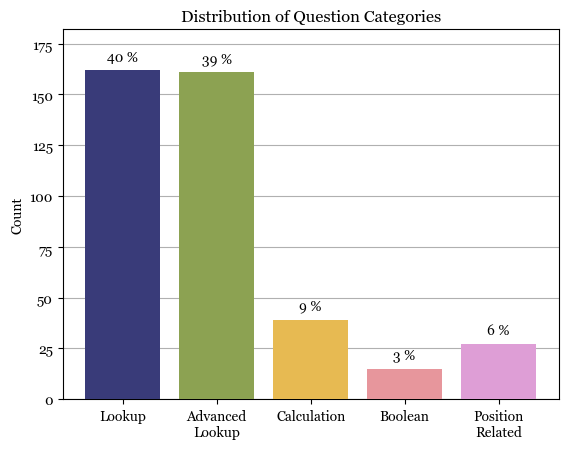

In [39]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in id_mapper_data]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "position related"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Position Related"]
category_counts = [categories.count(cat) for cat in unique_categories]
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 5, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_wiki_tables.pdf", bbox_inches='tight')

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_3115/1976771576.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_domains))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_3115/1976771576.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_3115/1976771576.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


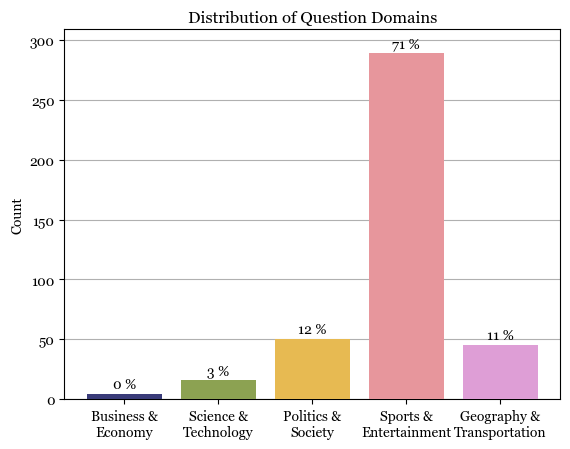

In [40]:
# plot the distribution of domains
# also show the percentage of the domains as numbers
domains = [doc["domain"] for doc in id_mapper_data]
unique_domains = ["business & economy", "science & technology", "politics & society", "sports & entertainment", "geography & transportation"]
domain_counts = [domains.count(domain) for domain in unique_domains]
domain_percentages = [count / len(domains) for count in domain_counts]


# Wrap labels if they are too long
labels = ["Business & Economy", "Science & Technology", "Politics & Society", "Sports &   Entertainment", "Geography &  Transportation"]
wrapped_labels = [textwrap.fill(label, 14) for label in labels]

# Define colors for each domain
colors = cm.get_cmap('tab20b', len(unique_domains))

fig, ax = plt.subplots()
bars = ax.bar(unique_domains, domain_counts, color=[colors(i) for i in range(len(unique_domains))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Domains", fontname='Georgia')
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(domain_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, domain in enumerate(unique_domains):
    ax.text(i, domain_counts[i] + 5, f"{int(domain_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing
    
ax.yaxis.grid(True, zorder=0)
plt.show()

# save figure to pdf
fig.savefig("../data/results/distribution_of_question_domains_wikitables.pdf", bbox_inches='tight')

In [ ]:
document_summary_path = "../data/evaluation/dataset_analysis/analysis-2025-03-13-16-39-28.json"
document_summary = load_json(document_summary_path)



# 0: html, 1: plain text, # 2: csv
document_list = document_summary[0]['dataset_summary']['document_list']
html_documents = document_summary[0]['dataset_summary']
plain_text_documents = document_summary[1]['dataset_summary']
csv_documents = document_summary[2]['dataset_summary']
tabtree_text = document_summary[3]['dataset_summary']

table_summary = document_summary[0]['dataset_summary']['table_statistics']

# compare filtered questions with document ids
document_ids = [doc["id"] for doc in document_list]
print(questions_filtered)
for doc_id in document_ids:
    question = next((q for q in questions_filtered if q['context'] == id_to_initial_context(doc_id)), None)
    if question is None:
        print(f"Document {doc_id} not found in questions")

# num of documents
num_html = len(html_documents["document_list"])

# print table statistics
print("Table statistics:")
print(f"Number of HTML documents: {num_html}")


print("\nRows:")
print(f"  Avg: {table_summary["rows_statistics"]["avg"]}")
print(f"  Min: {table_summary["rows_statistics"]["min"]}")
print(f"  Max: {table_summary["rows_statistics"]["max"]}")
print(f"  Std: {table_summary["rows_statistics"]["std"]}")

print("\nColumns:")
print(f"  Avg: {table_summary["columns_statistics"]["avg"]}")
print(f"  Min: {table_summary["columns_statistics"]["min"]}")
print(f"  Max: {table_summary["columns_statistics"]["max"]}")
print(f"  Std: {table_summary["columns_statistics"]["std"]}")


print("\nCharacters:")
print(f"  Avg: {plain_text_documents["character_statistics"]["avg"]}")
print(f"  Min: {plain_text_documents["character_statistics"]["min"]}")
print(f"  Max: {plain_text_documents["character_statistics"]["max"]}")
print(f"  Std: {plain_text_documents["character_statistics"]["std"]}")

print("\nTokens HTML:")
print(f"  Avg: {html_documents["token_statistics"]["avg"]}")
print(f"  Min: {html_documents["token_statistics"]["min"]}")
print(f"  Max: {html_documents["token_statistics"]["max"]}")
print(f"  Std: {html_documents["token_statistics"]["std"]}")

print("\nTokens CSV:")
print(f"  Avg: {csv_documents["token_statistics"]["avg"]}")
print(f"  Min: {csv_documents["token_statistics"]["min"]}")
print(f"  Max: {csv_documents["token_statistics"]["max"]}")
print(f"  Std: {csv_documents["token_statistics"]["std"]}")

print("\nTokens TabTree Text:")
print(f"  Avg: {tabtree_text["token_statistics"]["avg"]}")
print(f"  Min: {tabtree_text["token_statistics"]["min"]}")
print(f"  Max: {tabtree_text["token_statistics"]["max"]}")
print(f"  Std: {tabtree_text["token_statistics"]["std"]}")



[{'id': 'nt-83', 'utterance': 'which ethnicity is previous from dungan', 'context': 'csv/204-csv/984.csv', 'targetValue': 'Belorussian'}, {'id': 'nt-352', 'utterance': 'what is each interval name with a size (cents) greater than 500?', 'context': 'csv/203-csv/445.csv', 'targetValue': 'perfect fifth|septendecimal tritone|septimal tritone|tridecimal tritone|11th harmonic|(15:11) augmented fourth'}, {'id': 'nt-418', 'utterance': 'how many bridges are longer than 200 feet?', 'context': 'csv/204-csv/507.csv', 'targetValue': '17'}, {'id': 'nt-428', 'utterance': 'how many stations have a distance below 15km?', 'context': 'csv/203-csv/273.csv', 'targetValue': '7'}, {'id': 'nt-513', 'utterance': 'how many countries have at most 5 medals?', 'context': 'csv/203-csv/548.csv', 'targetValue': '3'}, {'id': 'nt-657', 'utterance': 'how long was the teams longest losing streak?', 'context': 'csv/204-csv/151.csv', 'targetValue': '5 games'}, {'id': 'nt-709', 'utterance': 'what are the total games won agai